#### Week 5 and 6 Assignment
#### Michael Perrine
#### DSC 540 Data Wrangling
#### Professor Williams

# Activity 5.01 Web Scraping Wikipedia- List of Countries by GDP(Nominal)

In this first activity I will scrape data from a Wikipedia page. My goal is to extract a table listing the countries and their gdp. For this analysis I will import beautiful soup, requests, and pandas. The requests library will create the request for the html from Wikipedia. The beautiful soup library will allow me to extract the data from the website and the pandas library is needed to manipulate the data frame.

In [1]:
# load libraries
from bs4 import BeautifulSoup
import pandas as pd
import requests
import sqlite3

In [2]:
# Get URL
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"

page = requests.get(url)

soup = BeautifulSoup(page.text, "html.parser")

In [ ]:
# This code prints the html and the prettify code creates indents 
# the html according to relationship with the parent
print(soup.prettify())

In [4]:
# This code prints the total number of tables in the html 
print("Total number of tables: {}".format(len(soup)))

Total number of tables: 3


In [ ]:
# This code prints the table that I want from the extracted html
table = soup.find_all("table")[2]
print(table)

In [ ]:
#table = table.find_all("table", class_ = "wikitable sortable sticky-header-multi static" )
table = soup.find("table", class_ = "wikitable sortable sticky-header-multi static-row-numbers")
table

In [ ]:
# This code extracts the headers and places them in an object called country_titles
country_titles = table.find_all("th")

In [ ]:
# This code prints the country_titles headers
country_titles

In [ ]:
# This code cleans the headers
country_table_titles = [title.text.strip() for title in country_titles]

country_table_titles

['Country/Territory',
 'IMF[1][12]',
 'World Bank[13]',
 'United Nations[14]',
 'Forecast',
 'Year',
 'Estimate',
 'Year',
 'Estimate',
 'Year']

In [ ]:
# This code creates the dataframe and and I need to drop the column IMF, World Bank, and United
# Nations. These column names appear above the table as an additional header

country_gdp = pd.DataFrame(columns= country_table_titles)
country_gdp = country_gdp.drop(["IMF[1][12]", "World Bank[13]", "United Nations[14]"], axis = 1)
country_gdp

,Country/Territory,Forecast,Year,Estimate,Year,Estimate,Year


In [ ]:
# This column takes all the row data and saves it in an object named column_data
column_data = table.find_all("tr")
column_data

In [ ]:
# This code creates a for loop to iterate through the lists and save the rows.
for row in column_data[2:]:
    row_data = row.find_all("td")
    individual_row_data = [data.text.strip() for data in row_data]
    
    print(individual_row_data)
    #length = len(country_gdp)
    #country_gdp.loc[length] = individual_row_data

In [ ]:
# This code saves the data into the dataframe
length = len(country_gdp)
    
country_gdp.loc[length] = individual_row_data

In [ ]:
# This code displays the first five rows of the new data frame
country_gdp.head()

,Country/Territory,Forecast,Year,Estimate,Year,Estimate,Year
0,Tuvalu,66,2024,62,2023,59,2022
1,World,"115,494,312",2025,"105,435,540",2023,"100,834,796",2022
2,United States,"30,338,000",2025,"27,360,935",2023,"25,744,100",2022
3,China,"19,535,000",[n 1]2025,"17,794,782",[n 3]2023,"17,963,170",[n 1]2022
4,Germany,"4,922,000",2025,"4,456,081",2023,"4,076,923",2022


In [ ]:
# This code displays the last five rows of the data frame
country_gdp.tail()

,Country/Territory,Forecast,Year,Estimate,Year,Estimate,Year
41,Netherlands,"1,273,000",2025,"1,118,125",2023,"1,008,027",2022
42,Saudi Arabia,"1,138,000",2025,"1,067,583",2023,"1,108,148",2022
43,Switzerland,"1,000,000",2025,"884,940",2023,"818,426",2022
44,Poland,"915,451",2025,"811,229",2023,"688,125",2022
45,Tuvalu,66,2024,62,2023,59,2022


# Activity 6.01 Handling Outlier and Missing Data

In [17]:
# Load libraries needed for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# Load data
data = pd.read_csv(r"visit_data.csv")

In [19]:
# View first 5 rows and ensure data loaded properly
data.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [20]:
# Check to see if data is duplicated
print("First name is dupicated - {}".format(any(data.first_name.duplicated())))
print("Last name is dupicated - {}".format(any(data.last_name.duplicated())))
print("Email is dupicated - {}".format(any(data.email.duplicated())))


First name is dupicated - True
Last name is dupicated - True
Email is dupicated - False


In [21]:
# Check for NaN values the code displays different ways to display the result
print("The column Email contains NaN - %r " % data.email.isnull().values.any())
print("The column IP Address contains NaN -%s "% data.ip_address.isnull().values.any())
print("The column Visit contains NaN - %s " % data.visit.isnull().values.any())



The column Email contains NaN - np.False_ 
The column IP Address contains NaN -False 
The column Visit contains NaN - True 


In [22]:
# This code adjusts the size of the data
data_prev=data.shape # This code preserves the original size
data = data[np.isfinite(data["visit"])] # This code 
data_after = data.shape



In [23]:
print("The size of the previous data is :", data_prev)
print("The size of the previous data is :", data_after)

The size of the previous data is : (1000, 7)
The size of the previous data is : (974, 7)


Text(0, 0.5, 'Total Visits')

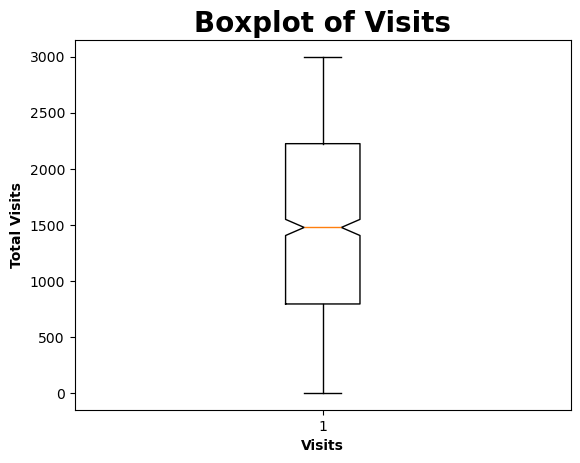

In [24]:
plt.boxplot(data.visit, notch= True)
plt.title("Boxplot of Visits",fontsize = 20, weight = "bold")
plt.xlabel("Visits", fontsize = 10, weight = "bold")
plt.ylabel("Total Visits", fontsize = 10, weight = "bold")

In [25]:
# This code removes the outliers and provides the 
# new size of the data set
new_data = data[(data["visit"] <= 2900) & \
    (data["visit"] >=100)]
print("The new size of the data is: {}".format(*new_data.shape))

The new size of the data is: 923


# SQL Database Assignment


In [26]:
# This code creates the database
conn = sqlite3.connect("cust.db")

In [27]:
# This code creates the cursor to manage the database
c = conn.cursor()

In [28]:
# This code creates the table for the database
c.execute("""CREATE TABLE customer(
    First TEXT,
    Last, 
    Address TEXT,
    City TEXT, 
    State TEXT, 
    Zip Code INTEGER, 
    Phone Number TEXT)""")
conn.commit()

In [29]:
# This series of codes adds the customer data to the table
c.execute('INSERT INTO customer VALUES("Michael", "Perrine", "1023 Cerro Alto Dr", "San Antonio",  "TX",  78213, "210-343-9973")')
c.execute('INSERT INTO customer VALUES("Jon", "Smith", "23 Main Dr", "San Antonio", "TX",  78213,  "210-885-9966")')
c.execute('INSERT INTO customer VALUES("Mitchel", "Palmer", "11529 Blake Ave", "Kansas City", "Mo", 64802, "816-213-1111")')
c.execute('INSERT INTO customer VALUES("Ann", "Jones", "14 Ave E", "Johnson City", "OK", 45783, "478-329-7512")')
c.execute('INSERT INTO customer VALUES("Jack", "Johnson", "12 Beach Dr", "Kona", "Hi", 97643, "549-654-9632")')
c.execute('INSERT INTO customer VALUES("Sheryl", "Crow", "124965 Star St","Malibu", "Ca", 23649,  "555-746-8745")')
c.execute('INSERT INTO customer VALUES("Michael", "Myers", "666 Chrystal Park", "Chrystal City", "Or", 62015, "321-666-7845")')
c.execute('INSERT INTO customer VALUES("Mary", "Peters", "14 North Ave", "Boston", "Ma", 39478, "548-147-8793")')
c.execute('INSERT INTO customer VALUES("John", "Smith", "10 Apple Ln", "Park City", "Ut", 52169, "216-954-3322")')
c.execute('INSERT INTO customer VALUES("Harry", "Potter", "1023 Wizard Way", "London", "Wy", 30365, "568-965-7410")')

In [30]:
# This code selects a customer
c.execute("SELECT * FROM customer WHERE last = 'Johnson'")

In [31]:
# This code displays the query
c.fetchone()

('Jack', 'Johnson', '12 Beach Dr', 'Kona', 'Hi', 97643, '549-654-9632')

In [32]:
# This code selects a customer
c.execute("SELECT * FROM customer WHERE first ='Michael'")

In [33]:
# This code displays the query
c.fetchone()

('Michael',
 'Perrine',
 '1023 Cerro Alto Dr',
 'San Antonio',
 'TX',
 78213,
 '210-343-9973')

In [34]:
# This code selects a customer
c.execute("SELECT * FROM customer WHERE city ='Kansas City'")

In [35]:
# This code displays the query
c.fetchone()

('Mitchel',
 'Palmer',
 '11529 Blake Ave',
 'Kansas City',
 'Mo',
 64802,
 '816-213-1111')

In [36]:
conn.close()